In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


In [2]:
data = pd.read_csv('../input/master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
data.shape

(27820, 12)

In [6]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
data.isnull().mean()

country               0.000000
year                  0.000000
sex                   0.000000
age                   0.000000
suicides_no           0.000000
population            0.000000
suicides/100k pop     0.000000
country-year          0.000000
HDI for year          0.699353
 gdp_for_year ($)     0.000000
gdp_per_capita ($)    0.000000
generation            0.000000
dtype: float64

Since 'HDI for Year' has almost 70% null values we will drop this column. Also 'country-year' column does not contain anything useful as we have separate country and year columns. So we will drop it too.

In [8]:
data = data.drop(['HDI for year', 'country-year'], axis = 1)

In [9]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

'HDI for Year' and 'country-year' are removed. Now we need to rename columns to something more convenient.

In [10]:
data = data.rename(columns = {'country':'Country', 'year':'Year', 'sex':'Sex', 'age':'Age', 'suicides_no':'Suicides', 'population':'Population', 
                             'suicides/100k pop':'SuicideRate', ' gdp_for_year ($) ':'GDP',
                              'gdp_per_capita ($)': 'GDPperCapita', 'generation': 'Generation'})

Checking column names is necessary gdp_for_year ($) has unnecessary spaces in the beginning and end.

In [11]:
data.columns

Index(['Country', 'Year', 'Sex', 'Age', 'Suicides', 'Population',
       'SuicideRate', 'GDP', 'GDPperCapita', 'Generation'],
      dtype='object')

In [12]:
data.describe()

,Year,Suicides,Population,SuicideRate,GDPperCapita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
Country         27820 non-null object
Year            27820 non-null int64
Sex             27820 non-null object
Age             27820 non-null object
Suicides        27820 non-null int64
Population      27820 non-null int64
SuicideRate     27820 non-null float64
GDP             27820 non-null object
GDPperCapita    27820 non-null int64
Generation      27820 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


Checking Object Variables

In [14]:
data['Country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [15]:
#Number of Countries in Dataset
len(data['Country'].unique())

101

In [16]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
data['Age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [18]:
data['GDP'].unique()

array(['2,156,624,900', '2,126,000,000', '2,335,124,988', ...,
       '51,821,573,338', '57,690,453,461', '63,067,077,179'], dtype=object)

In [19]:
data['Generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [20]:
data.corr()

,Year,Suicides,Population,SuicideRate,GDPperCapita
Year,1.000000,-0.004546,0.008850,-0.039037,0.339134
Suicides,-0.004546,1.000000,0.616162,0.306604,0.061330
Population,0.008850,0.616162,1.000000,0.008285,0.081510
SuicideRate,-0.039037,0.306604,0.008285,1.000000,0.001785
GDPperCapita,0.339134,0.061330,0.081510,0.001785,1.000000


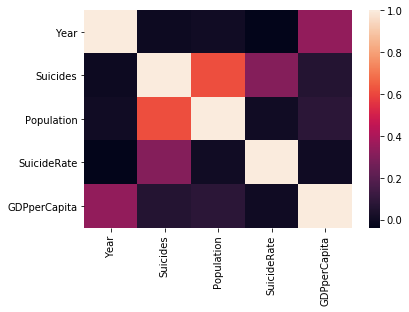

In [21]:
sns.heatmap(data.corr())

### Analyzing Suicides by Year

In [22]:
data_year = data.groupby('Year')

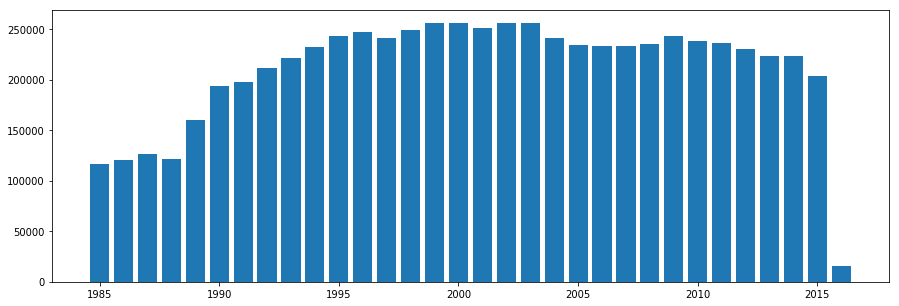

In [23]:
plt.figure(figsize= (15,5))
plt.bar(x = data_year['Suicides'].sum().keys(), height = data_year['Suicides'].sum())
plt.show()

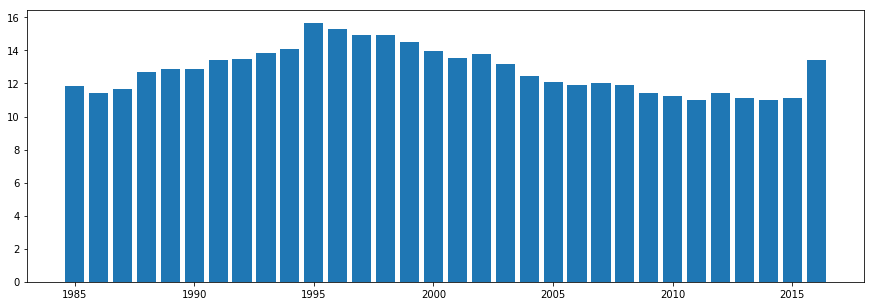

In [24]:
plt.figure(figsize= (15,5))
plt.bar(x = data_year['SuicideRate'].mean().keys(), height = data_year['SuicideRate'].mean())
plt.show()

### Analyzing Suicides by Country

In [25]:
data_country = data.groupby('Country')

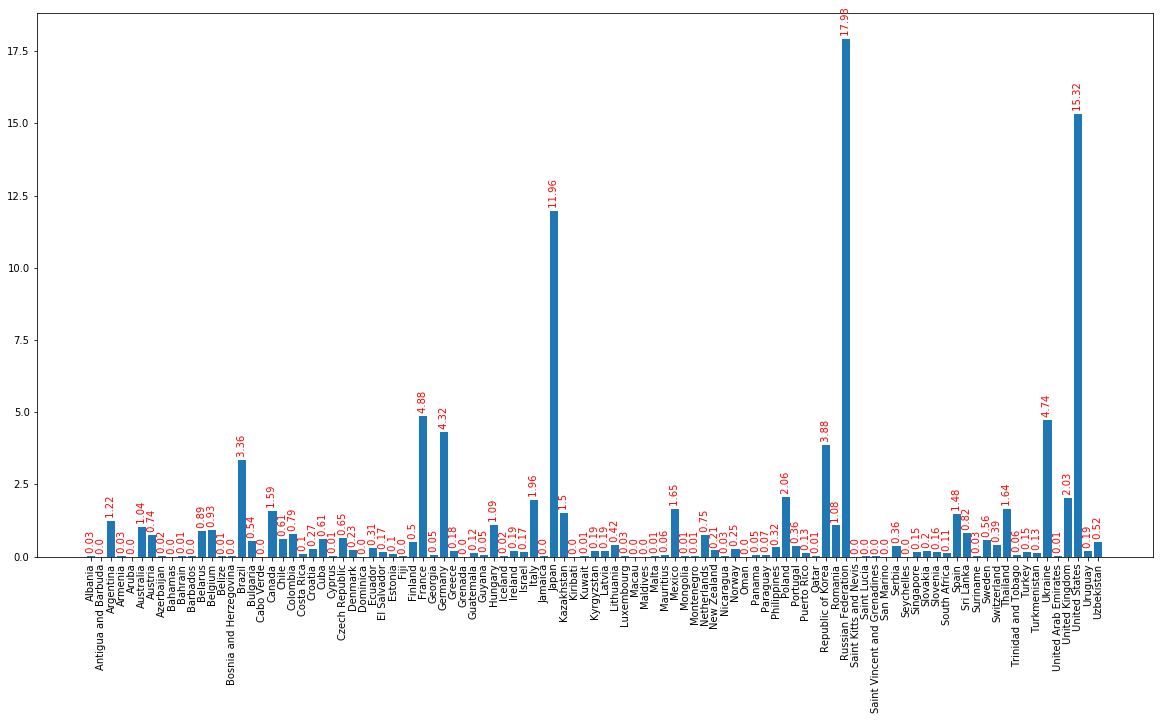

In [26]:
plt.figure(figsize=(20,10))
height = 100*data_country['Suicides'].sum()/data['Suicides'].sum()
x = data_country['Suicides'].sum().keys()
plt.bar(x = x, height= height)
plt.xticks(rotation='vertical')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='red', ha='center', rotation='vertical', va='bottom')
plt.show()

There are some countries which have a exceptionally high number of suicides.

In [27]:
height['Japan'] + height['Russian Federation'] + height['United States']

45.20549995406332

'Japan', 'Russian Federation' and 'United States' account for 45% of all suicides all over the world.

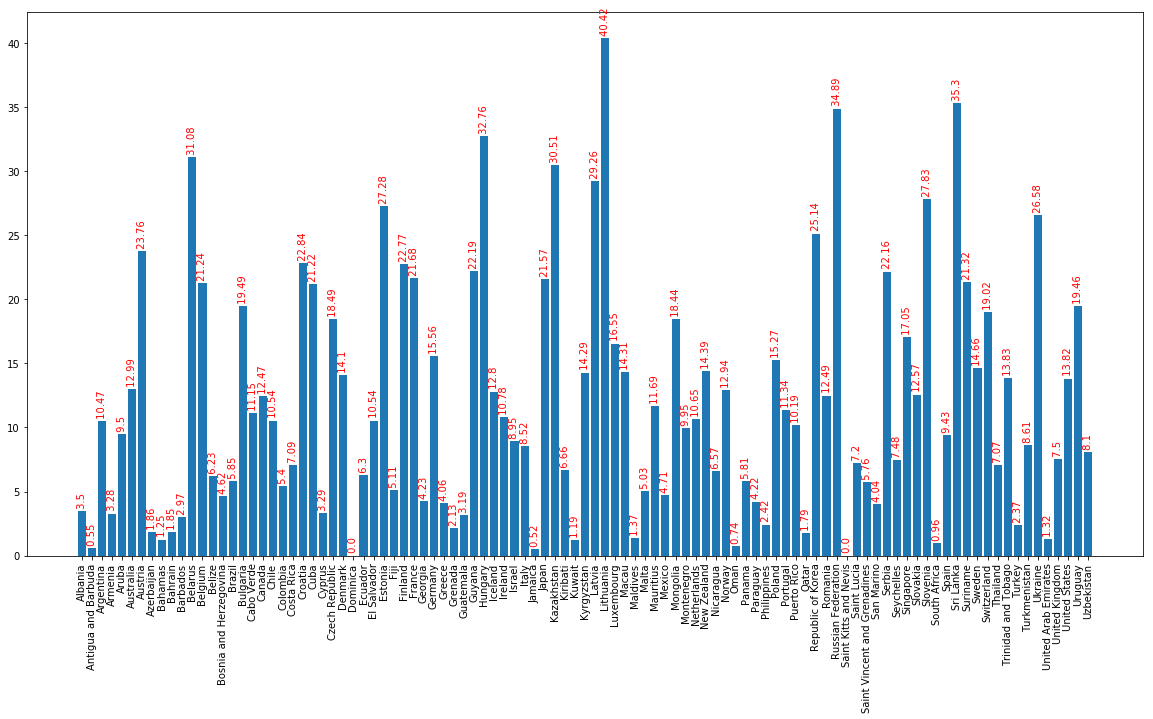

In [37]:
plt.figure(figsize=(20,10))
height = data_country['SuicideRate'].mean()
x = data_country['SuicideRate'].mean().keys()
plt.bar(x = x, height= height)
plt.xticks(rotation='vertical')
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='red', ha='center',rotation='vertical',va='bottom')
plt.show()

### Analyzing Suicides by Gender

In [31]:
data_gender = data.groupby('Sex')

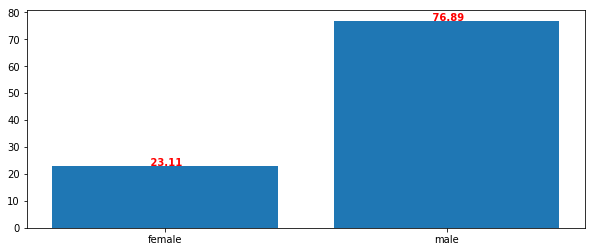

In [38]:
plt.figure(figsize=(10,4))
height = 100*data_gender['Suicides'].sum()/data['Suicides'].sum()
x =  data_gender['Suicides'].sum().keys()
plt.bar(x = x, height = height)
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='red', ha='center', fontweight='bold')
plt.show()

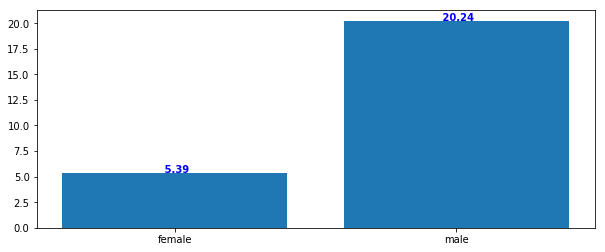

In [33]:
plt.figure(figsize=(10,4))
height = data_gender['SuicideRate'].mean()
x =  data_gender['SuicideRate'].mean().keys()
plt.bar(x = x, height = height)
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')
plt.show()

### Analyzing Suicides by Age-Group

In [34]:
data_age = data.groupby('Age')

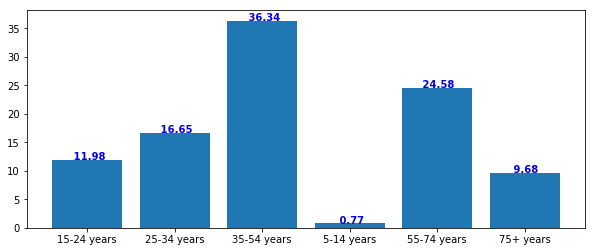

In [35]:
plt.figure(figsize=(10,4))
height = 100*data_age['Suicides'].sum()/data['Suicides'].sum()
x =  data_age['Suicides'].sum().keys()
plt.bar(x = x, height = height)
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')
plt.show()

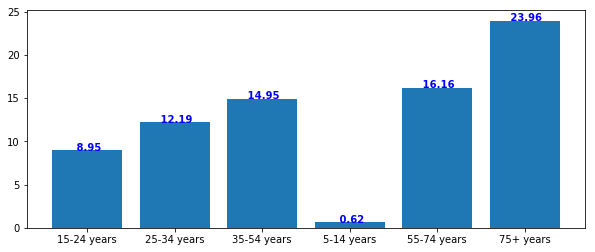

In [40]:
plt.figure(figsize=(10,4))
height = data_age['SuicideRate'].mean()
x =  data_age['SuicideRate'].mean().keys()
plt.bar(x = x, height = height)
for i,v in enumerate(height):
    plt.text(i, v, " "+str(round(v,2)), color='blue', ha='center', fontweight='bold')
plt.show()